In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
TEST_CASE = 10
from gym_tetris.actions import MOVEMENT

In [138]:
level = []
action_heatmap = []
for test in range(TEST_CASE):
    df = pd.read_csv(f"./UNREAL-eval/{test}.csv")
    df["level"] = test + 10

    action_freq = np.array([
        [seq.count(str(action)) for action in range(12)] for seq in df["action sequence"]
    ])
    total_action_freq = action_freq.sum(axis=0)
    # df["action freq"] = total_action_freq.flatten()

    action_freq_df = pd.DataFrame([total_action_freq], columns=[' '.join(item) for item in MOVEMENT])
    action_freq_df["level"] = test + 10

    level.append(df)
    action_heatmap.append(action_freq_df)


level = pd.concat(level, ignore_index=True)
action_heatmap = pd.concat(action_heatmap, ignore_index=True)

In [139]:
level.head()

,rewards,blocks,episode length,survival time,action sequence,level
0,3.0,11,153,2.963557,"[6, 9, 6, 3, 3, 4, 3, 3, 9, 3, 5, 10, 5, 3, 3,...",10
1,2.0,17,272,4.913170,"[6, 0, 0, 6, 0, 6, 0, 3, 0, 6, 0, 6, 6, 3, 0, ...",10
2,3.0,14,230,5.357151,"[6, 6, 0, 6, 0, 3, 6, 3, 6, 3, 9, 0, 6, 3, 3, ...",10
3,10.0,15,255,4.656740,"[3, 3, 6, 3, 0, 3, 3, 3, 6, 6, 6, 6, 0, 6, 3, ...",10
4,7.0,21,331,6.197295,"[6, 6, 0, 6, 9, 6, 0, 6, 0, 6, 6, 9, 0, 6, 3, ...",10


In [140]:
action_heatmap.head()

,NOOP,A,B,right,right A,right B,left,left A,left B,down,down A,down B,level
0,161946,128579,75875,174014,8767,71066,213896,999,45977,170462,23577,28489,10
1,383015,335664,39963,137887,11498,23308,207003,1997,3062,39548,164794,19121,11
2,389392,197016,25971,210929,9800,17431,243140,833,1192,48064,134658,10009,12
3,221049,119171,52290,187414,7889,54013,247067,717,27550,146988,45825,18870,13
4,395550,245005,28746,201155,12941,22119,220630,1287,1213,48120,161365,15797,14


In [141]:
action_heatmap.tail()

,NOOP,A,B,right,right A,right B,left,left A,left B,down,down A,down B,level
5,372994,167215,32679,223884,7062,18636,250149,591,2424,53107,121875,7364,15
6,364723,358223,30557,133754,19155,22539,210396,2836,2441,53496,165038,33448,16
7,369397,209979,38940,202671,7906,22823,227921,862,3389,67761,142701,9583,17
8,218323,122869,51564,192132,10286,58923,235713,1001,32435,133212,32239,24557,18
9,348431,191765,23493,190616,21268,26589,270985,2102,2719,52521,93327,37501,19


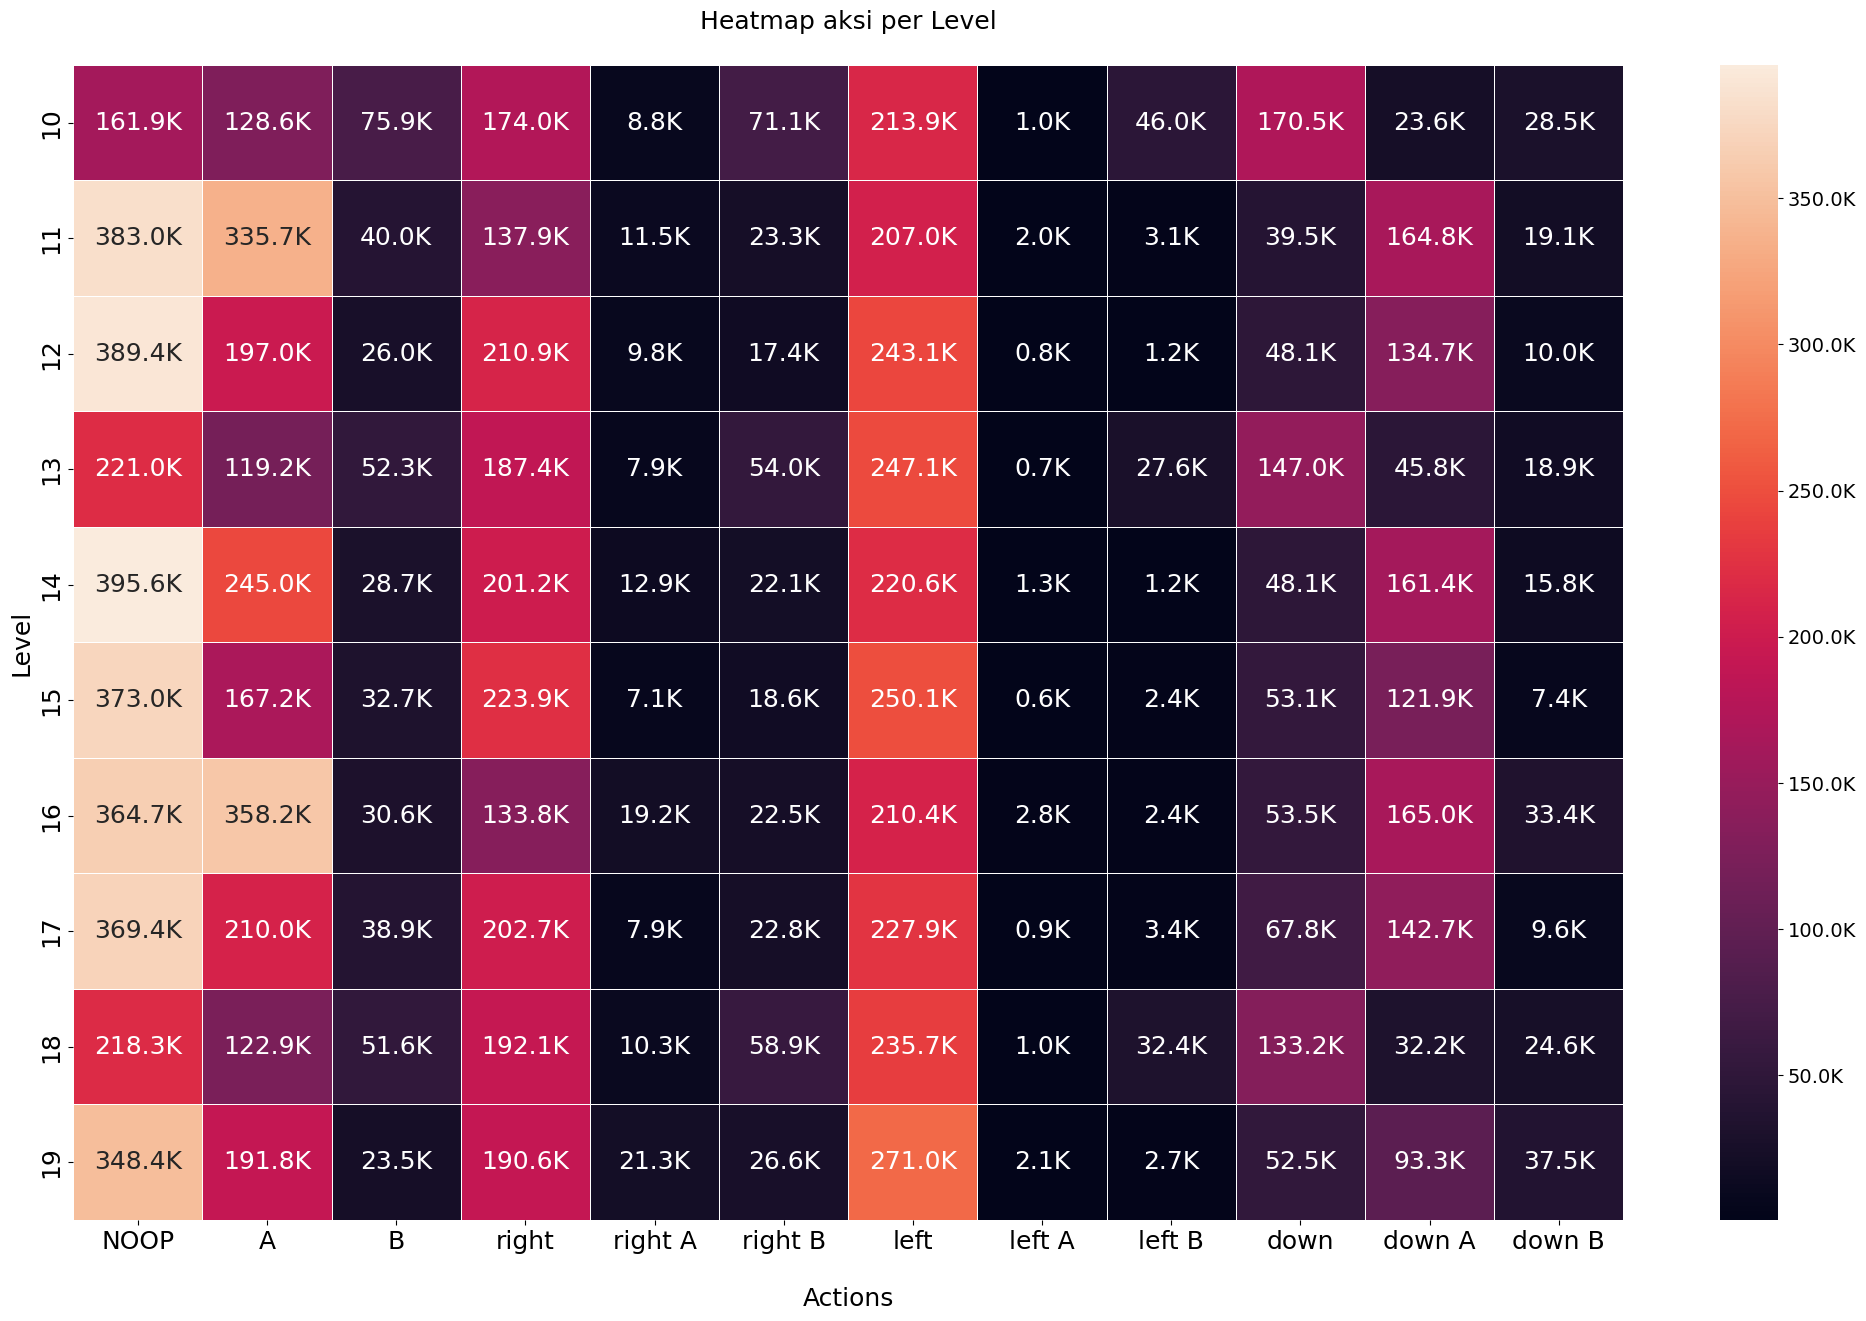

In [147]:
plt.figure(figsize=(25, 15))  # You can adjust the size
ax = sns.heatmap(action_heatmap.drop(columns=['level']), annot=True, cmap="rocket", fmt='d', linewidths=0.5, yticklabels=action_heatmap["level"], annot_kws={"size": 18})

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

def format_thousands(x, pos=None):
    return f'{x / 1000:.1f}K'

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)  # Ukuran font ticks colorbar
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(format_thousands))
for text in ax.texts:
    text.set_text(format_thousands(int(text.get_text())))

# Add labels and title
plt.title('Heatmap aksi per Level\n', fontsize=18)
plt.xlabel('\nActions', fontsize=18)
plt.ylabel('Level', fontsize=18)

# Show the heatmap
plt.show()

In [148]:
summary_df = level.groupby("level").agg(
    avg_scores=("rewards", "mean"),
    avg_blocks=("blocks", "mean"),
    avg_episode_length=("episode length", "mean"),
).reset_index()

In [149]:
summary_df.head()

,level,avg_scores,avg_blocks,avg_episode_length
0,10,14.075382,16.421982,263.446231
1,11,26.419702,20.610128,346.524454
2,12,30.231240,22.250000,382.504211
3,13,15.261494,16.939188,243.116760
4,14,27.027251,19.878555,296.091232


In [150]:
summary_df.tail()

,level,avg_scores,avg_blocks,avg_episode_length
5,15,28.316129,20.661444,307.066667
6,16,29.639801,19.439612,236.264240
7,17,24.509249,18.359483,222.724538
8,18,13.810547,16.483980,198.937711
9,19,8.600676,19.429349,187.588853


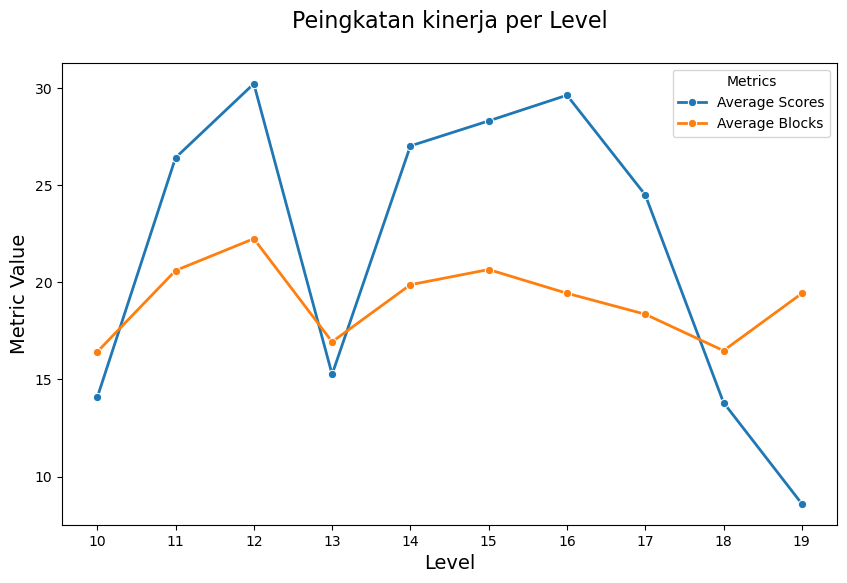

In [154]:
# Membuat lineplot untuk avg_scores, avg_blocks, dan avg_episode_length
plt.figure(figsize=(10, 6))

sns.lineplot(data=summary_df, x='level', y='avg_scores', marker='o', label='Average Scores', linewidth=2, errorbar="ci")
sns.lineplot(data=summary_df, x='level', y='avg_blocks', marker='o', label='Average Blocks', linewidth=2, errorbar="ci")
# sns.lineplot(data=summary_df, x='level', y='avg_episode_length', marker='o', label='Average Episode Length', linewidth=2, errorbar="ci")

# Menambahkan label dan title
plt.title('Peingkatan kinerja per Level\n', fontsize=16)
plt.xticks(summary_df['level'])
plt.xlabel('Level', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)

# Menambahkan legend
plt.legend(title='Metrics')

# Menampilkan plot
plt.show()

In [156]:
final_summary_df = summary_df.drop(columns=['level']).mean()

In [155]:
final_summary_df

avg_scores             21.789147
avg_blocks             19.047372
avg_episode_length    268.426490
dtype: float64